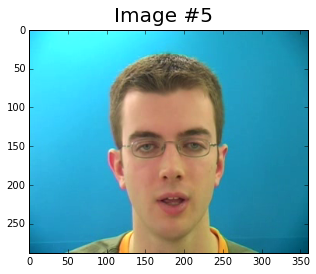

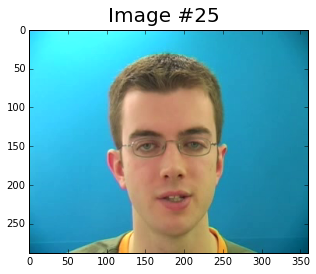

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import imageio

GRID_DIR = '/home/dneil/datasets/grid/video/'
filename = 's5/lway7s.mpg'

vid = imageio.get_reader(GRID_DIR+filename,  'ffmpeg')
nums = [5, 25]
for num in nums:
    img = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('Image #{}'.format(num), fontsize=20)
    plt.imshow(img)

1 faces found.
(101, 84, 166, 166)


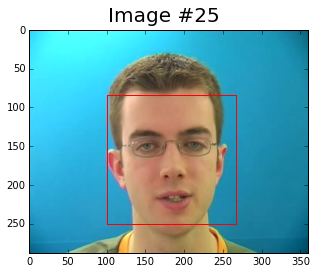

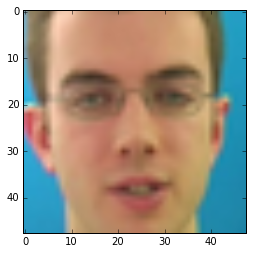

In [2]:
import cv2
import numpy as np
import matplotlib.patches as patches
import Image

final_size = (48, 48)

# Load face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Grayscale the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
print('{} faces found.'.format(len(faces)))

fig = plt.figure()
fig.suptitle('Image #{}'.format(num), fontsize=20)
plt.imshow(img)
ax = plt.gca()

for (x,y,w,h) in faces:
    print(x,y,w,h)
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor="red"))

# Resize the face to 48x48
x,y,w,h = faces[0]
im = Image.fromarray(img[y:y+h,x:x+w])
im.thumbnail(final_size, Image.ANTIALIAS)
extracted_face = np.array(im.getdata(),np.uint8).reshape(im.size[1], im.size[0], 3)

plt.figure()
plt.imshow(extracted_face)

## Functionify

In [1]:
import cv2
import numpy as np
import matplotlib.patches as patches
import Image
%matplotlib inline
from matplotlib import pyplot as plt
import imageio

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def find_face(inp_img):
    gray_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 5)
    if len(faces) != 1:
        raise AssertionError("Different than one face found: found {}!".format(len(faces)))
    else:
        return faces[0]

def extract_face(inp_img, final_size=(48,48), prev_pos=None):
    try:
        x,y,w,h = find_face(inp_img)
    except AssertionError as e:
        if prev_pos == None:
            raise AssertionError('!')
        else:
            x,y,w,h = prev_pos
    im = Image.fromarray(inp_img[y:y+w,x:x+h])
    im.thumbnail(final_size, Image.ANTIALIAS)
    extracted_face = np.array(im.getdata(),np.uint8).reshape(
        im.size[1], im.size[0], 3)
    return extracted_face, (x,y,w,h)

print('Functions declared.')

Functions declared.


75 frames found in s5/lway7s.mpg.


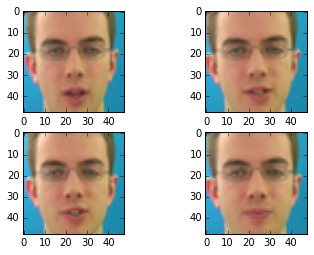

In [2]:
GRID_DIR = '/home/dneil/datasets/grid/video/'
filename = 's5/lway7s.mpg'

final_size = (48,48)
vid = imageio.get_reader(GRID_DIR+filename,  'ffmpeg')

print('{} frames found in {}.'.format(vid.get_length(), filename))
out_data = np.zeros( (vid.get_length(), final_size[1], final_size[0], 3) ).astype('uint8')
pos = None
for i in range(vid.get_length()):
    out_data[i], pos = extract_face(vid.get_data(i), prev_pos = pos)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(out_data[5])
plt.subplot(2,2,2)
plt.imshow(out_data[25])
plt.subplot(2,2,3)
plt.imshow(out_data[44])
plt.subplot(2,2,4)
plt.imshow(out_data[70])

# Too big to run the whole thing here!

Check out extract_faces.py.  Takes about 10 hours to do - much longer than is necessary, but we shouldn't have to do it very often so not worth the time to optimize.